# Archivo de soluciones! Solo para tutores

## Manejando datos con Pandas

En este notebook, aplicaremos lo aprendido para sacar información a partir de un dataset real.

Usaremos este dataset de _Kaggle_ https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?resource=download, que contiene datos de las 1000 mejores películas y series de la historia según IMDB.

Para que no tengáis que crearos una cuenta en Kaggle, hemos subido el dataset a la página web del curso también.

_NOTA: El esquema de los datos se puede consultar en la página, pero también lo revisaremos (y adaptaremos) a lo largo de este notebook_

## Como usar este notebook
El objetivo es complementar lo visto en la clase de pandas, así que (en su mayoría) usaremos las funciones vistas ahí.

A lo largo del notebook habrá ejercicios propuestos. __El único ejercicio totalmente obligatorio es el 0, los demás pueden dejarse en blanco y el notebook seguirá siendo ejecutable. Sin embargo, deberíais ir completándolos__

__Si téneis dudas u os atascáis, ¡avisadnos!__

Un recordatorio acerca de los Notebooks: si queremos imprimir algo que está en la última fila de la celda, __no hace falta usar print()__. De hecho, para imprimir datasets de pandas, es buena idea hacerlo de esta forma en vez que usar `print(df)` en medio de la celda, ya que se imprimirá con un formato más chulo (también se puede forzar esto con `display(df)`). 

De todas formas, a veces si usamos `print()` al final de las celdas, no es obligatorio omitirlo.

In [77]:
# En primer lugar, importamos pandas y numpy, además de algunas librerías necesarias com os
import numpy as np
import pandas as pd
import os

In [78]:
# Debemos configurar el path del que leeremos el dataset. 
# Por ejemplo, podemos tener este árbol de directorios:
# (DIRECTORIO BASE)
# | -- data
# | -- | imdb_top_1000.csv
# | -- | ...
# | -- notebooks
# | -- | imdb_analysis.ipynb
# | -- | ...	
# | -- ...

# Las variables en la siguiente celda de código representan este ejemplo

#### Ejercicio 0.
Ajustar las variables `data_folder` y `path` para que apunten al fichero dónde tenemos nuestros datos.

NOTA: puede que tengáis que quitar los .. o añadir otras rutas, no hace falta seguir el esquema de directorios que he puesto arriba!

Si tenemos los datos en el mismo directorio que este script,  `data_folder` debería ser  `os.path.join('.')` 

In [79]:
data_folder = os.path.join('..', 'data')
file_name = 'imdb_top_1000.csv'
path = os.path.join(data_folder, file_name)

In [80]:
# Ahora podemos leer el dataset con pandas e imprimir los tipos de datos de cada columna
# Usamos .read_csv para leer el archivo csv y .dtypes para obtener los tipos de datos de cada columna
df = pd.read_csv(path)
print(df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


## Exploración y limpieza de datos
- La primera fase de un proyecto de análisis de datos es extraer la información útil dentro de cada dataset
- A este proceso se le llama limpieza, pre-procesamiento o preparación de los datos
- Muy pocos datasets son perfectos, normalmente necesitamos adaptarlos a nuestros objetivos

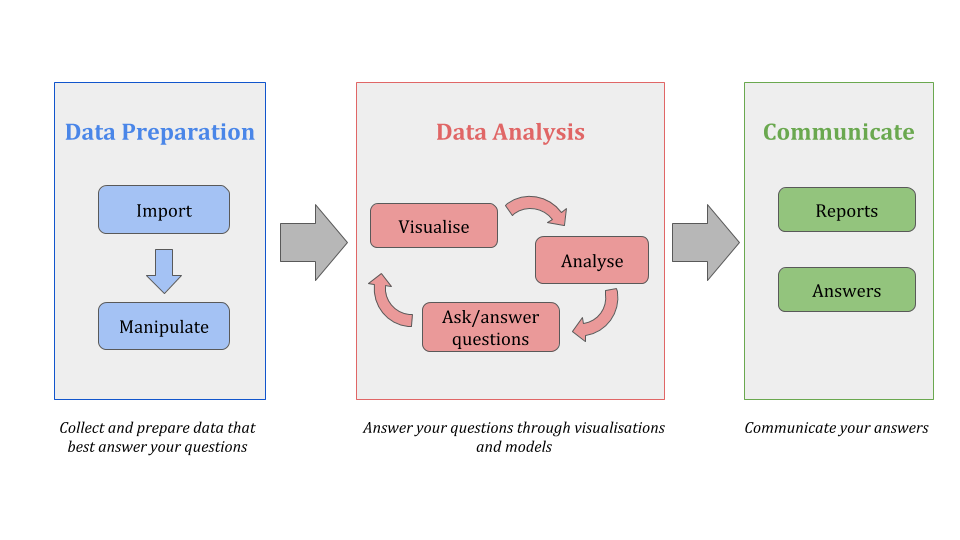

#### Ejercicio 1.

Imprime el número de filas y columnas del dataset.

Solución: 1000 filas y 16 columnas

In [81]:
# Ejercicio 1
print(f"{df.shape[0]} filas y {df.shape[1]} columnas")

1000 filas y 16 columnas


In [82]:
# También podemos querer ver las primeras filas del dataset para hacernos una idea de cómo es
# NOTA: usamos print aquí para poder clickar los links, pero se ve más bonito con df.head(3) directamente!
print(df.head(3))

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1           Star2          Star3  \
0 

#### Ejercicio 2.

Los links de la columna `Poster_Link` estan caídos. Elimina esta columna e imprime las 3 primeras filas de nuevo

In [83]:
df = df.drop(columns='Poster_Link')
print(df.head(3))

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   

    

In [84]:
# Ahora veamos si el dataset tiene valores nulos
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [85]:
# En primer lugar, hay valores nulos en 'Certificate', que contiene la clasificación por edades de las películas. 
# Este valor se puede rellenar fácilmente, veamos qué tipos de valores admite esta columna
print(df['Certificate'].unique())

# Podemos entonces cambiar los valores nulos por 'Unrated'
df['Certificate'] = df['Certificate'].fillna('Unrated')

# Y ya no tenemos NaNs en la columna Certificate
print(df['Certificate'].isna().sum())

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']
0


In [86]:
filas_con_nan = df[df.isna().any(axis=1)]

# Mostramos las primeras 4 filas con NaN
print(filas_con_nan.head(4))

             Series_Title Released_Year Certificate  Runtime  \
18               Hamilton          2020       PG-13  160 min   
20        Soorarai Pottru          2020           U  153 min   
30                Seppuku          1962     Unrated  133 min   
32  It's a Wonderful Life          1946          PG  130 min   

                        Genre  IMDB_Rating  \
18  Biography, Drama, History          8.6   
20                      Drama          8.6   
30     Action, Drama, Mystery          8.6   
32     Drama, Family, Fantasy          8.6   

                                             Overview  Meta_score  \
18  The real life of one of America's foremost fou...        90.0   
20  Nedumaaran Rajangam "Maara" sets out to make t...         NaN   
30  When a ronin requesting seppuku at a feudal lo...        85.0   
32  An angel is sent from Heaven to help a despera...        89.0   

            Director               Star1           Star2             Star3  \
18       Thomas Kail  Li

In [87]:
# También tenemos valoes nulos en Meta_score, que es la puntuación de las películas en Metacritic, y en Gross, 
# que es el dinero que ha recaudado la película. Imputar estos datos es más complicado, se podrían eliminar
# las filas con valores nulos, o rellenarlos con la media de la columna, por ejemplo. También podemos eliminar
# la columan entera.

# Decidimos no borrar ninguna fila para no perder los datos más importantes que usaremos 
# más adelante (título, puntuación IMDB, lista de actores y director)

#### Ejercicio 3.
Eliminar la columna de puntuación metascore e imputar Gross por el valor `"0"`.

NOTA: El nuevo dataset debería ser de tamaño (1000, 14)

In [88]:
# Ejercicio 3.
if 'Meta_score' in df.columns:
    df = df.drop(columns='Meta_score')
df['Gross'] = df['Gross'].fillna("0")
df.shape

(1000, 14)

In [89]:
# Una curiosidad es que hay 2 películas con el mismo título.
# Sin embargo, son de años distintos, así que no son datos duplicados!
print(df[df["Series_Title"] == "Drishyam"])

    Series_Title Released_Year Certificate  Runtime                   Genre  \
87      Drishyam          2013           U  160 min  Crime, Drama, Thriller   
136     Drishyam          2015          UA  163 min   Crime, Drama, Mystery   

     IMDB_Rating                                           Overview  \
87           8.3  A man goes to extreme lengths to save his fami...   
136          8.2  Desperate measures are taken by a man who trie...   

            Director       Star1         Star2         Star3         Star4  \
87     Jeethu Joseph    Mohanlal         Meena  Asha Sharath        Ansiba   
136  Nishikant Kamat  Ajay Devgn  Shriya Saran          Tabu  Rajat Kapoor   

     No_of_Votes    Gross  
87         30722        0  
136        70367  739,478  


In [90]:
# Hay algunos ajustes más que hacer. La columna "Gross" está en un formato inadecuado para hacer cálculos.
print(df.dtypes)
# Imprimiendo dtypes vemos que es un "object" en vez de un entero o float
# Veamos que tipo de datos tenemos aquí
print(df['Gross'].head(10)) 

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
5    377,845,905
6    107,928,762
7     96,898,818
8    292,576,195
9     37,030,102
Name: Gross, dtype: object


In [91]:
# Se trata de números en formato xx,xxx,xxx,xxx, que no son reconocidos como números por Python.
# Para convertirlos a números, podemos primero eliminar las comas y luego convertir a datos numéricos usando pd.to_numeric()
# La opción errors='coerce' coloca NaNs cuando no se puede realizar la conversión
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# El proceso funcionó perfectamente, ya que no hay NaNs tras la conversión
print(df['Gross'].isna().sum())

0


In [92]:
# Runtime tiene un problema parecido, el formato es de "xx min", y no es reconocido como un número.
print(df['Runtime'].head(10))

0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
5    201 min
6    154 min
7    195 min
8    148 min
9    139 min
Name: Runtime, dtype: object


#### Ejercicio 4.
Convierte la columna `Runtime` a un número entero representando el número de minutos que dura la película

In [93]:
# Ejercicio 4.
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
print(df['Runtime'].isna().sum())

0


In [94]:
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [95]:
# Por último, observamos que en "Genre" hay varios géneros separados por comas.
# Veamos cuál es la fila con más generos. Este comando es algo más complicado (no hace falta que miréis esto en detalle) pero funciona así
# 1. df['Genere'].str saca la columna Genre como una serie de pandas (es decir, una lista de strings)
print(df['Genre'].str)
# 2. .str.split(',') divide cada string en la lista por comas, creando una lista de listas
print(df['Genre'].str.split(','))
# 3. .apply(len) aplica la función len a cada lista, devolviendo el número de elementos de cada lista
print(df['Genre'].str.split(',').apply(len))
# 4. .max() devuelve el máximo de la serie
numero_maximo_de_generos = df['Genre'].str.split(',').apply(len).max()

0                           [Drama]
1                   [Crime,  Drama]
2          [Action,  Crime,  Drama]
3                   [Crime,  Drama]
4                   [Crime,  Drama]
                   ...             
995      [Comedy,  Drama,  Romance]
996               [Drama,  Western]
997         [Drama,  Romance,  War]
998                   [Drama,  War]
999    [Crime,  Mystery,  Thriller]
Name: Genre, Length: 1000, dtype: object
0      1
1      2
2      3
3      2
4      2
      ..
995    3
996    2
997    3
998    2
999    3
Name: Genre, Length: 1000, dtype: int64


In [96]:
print("Máximo de géneros por película:", numero_maximo_de_generos)	

# Ahora lo que haremos será seguir replicar la idea de poner cada actor estrella en una columna, pero para los géneros. 
# Movemos los datos en formato Genre1, Genre2, Genre3 a las columnas Genre1, Genre2 y Genre3, que son suficientes gracias al cálculo de max_genres, 
# para las películas con menos de 3 géneros, se rellenará con NaNs.
# Para manipular las strings de un dataframe, podemos usar .str, luego usamos .replace() y .split() para extraer la lista de géneros
# e.g. Drama, Action, Adventure -> Drama,Action,Adventure -> ['Drama', 'Action', 'Adventure']
# Con la opción expand=True, se rellena con NaNs cuando no hay suficientes datos en el array que devuelve .split()
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.replace(' ', '').str.split(',', expand=True)
df = df.drop(columns='Genre')


Máximo de géneros por película: 3


In [97]:
# Ahora cada uno de los géneros está al final del dataset en las columnas Genre1, Genre2 y Genre3
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre1,Genre2,Genre3
0,The Shawshank Redemption,1994,A,142,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,Drama,None,None
1,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,Crime,Drama,None
2,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Action,Crime,Drama
3,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,Crime,Drama,None
4,12 Angry Men,1957,U,96,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,Crime,Drama,None


In [98]:
# Podemos ver cuántas películas tienen un solo género o solo 2 mirando la cantidad de NaNs
print("Total de películas:", df.shape[0])
print("Películas con un solo género:", df['Genre2'].isna().sum())
print("Películas con dos géneros:", df['Genre3'].isna().sum())
print("Películas con tres géneros:", df['Genre3'].notna().sum())

# Por supuesto, el dato más importante será Genre1 ya que está disponible en todas las filas 
# NOTA: no sabemos hasta que punto Genre1 es el género "principal" de la película, los datos originales solo lo colocaban como primero en la lista dada

Total de películas: 1000
Películas con un solo género: 105
Películas con dos géneros: 354
Películas con tres géneros: 646


In [99]:
# Para completar la limpieza inicial, vamos a ver cuántos valores únicos hay en cada columna
df.nunique()

Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
IMDB_Rating        17
Overview         1000
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             824
Genre1             14
Genre2             20
Genre3             19
dtype: int64

In [100]:
# Y también vamos a describir el dataset para ver si hay valores extraños
df.describe()

# Como vemos, la puntuación IMDB promedio de las 1000 mejores películas es 7.9 (lo cuál es bastante exigente) y la mejor película tiene un 9.3 (la perfección no existe!)

,Runtime,IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,122.891000,7.949300,2.736929e+05,5.653688e+07
std,28.093671,0.275491,3.273727e+05,1.032382e+08
min,45.000000,7.600000,2.508800e+04,0.000000e+00
25%,103.000000,7.700000,5.552625e+04,4.457098e+05
50%,119.000000,7.900000,1.385485e+05,1.070275e+07
75%,137.000000,8.100000,3.741612e+05,6.153989e+07
max,321.000000,9.300000,2.343110e+06,9.366622e+08


In [101]:
# Ya tenemos todos los datos limpios, así que ahora podemos guardarlos como un nuevo archivo csv
# Usaremos este .csv con los datos limpios en las siguientes sesiones (de matplotlib y scikit-learn)
output_path = os.path.join(data_folder, 'imdb_top_1000_clean.csv')
print("Guardando el archivo en:", output_path)
df.to_csv(output_path, index=False)

Guardando el archivo en: ../data/imdb_top_1000_clean.csv


## Análisis estadístico (descriptivo) de los datos
Ahora veamos algunos ejemplos básicos de análisis estádistico de los datos. Este dataset contiene información muy interesante y nos podemos hacer muchas preguntas:
- ¿Qué película tiene mejor puntuación?
- ¿Qué género es más popular en el top 1000?
- ¿Existen correlación entre género, duración u otros datos y puntuación de la película?
- ¿Qué actores aparecen en más películas?

¡Veamos como darle respuesta a estas preguntas!

<Axes: >

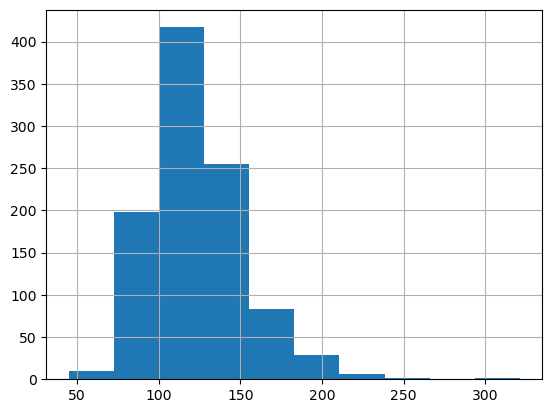

In [102]:
# En primer lugar, vamos a ver algunos histogramas acerca de los datos para entender mejor cómo sonç
# Normalmente esto se hace con matplotlib, que incluye muchísimos tipos de plots diferentes y configuracinones.
# Usaremos matplotlib en la siguiente clase, de momento usaremos la funcionalidad básica de pandas
df["Runtime"].hist()

<Axes: >

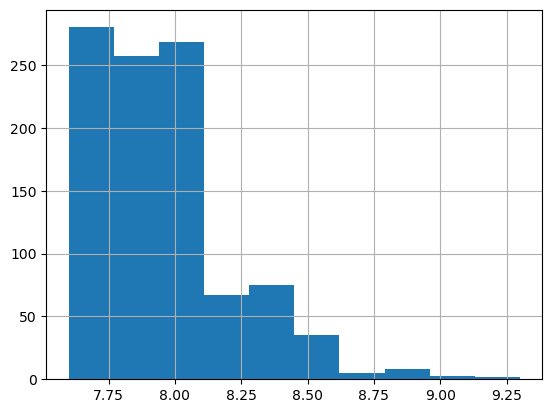

In [103]:
df["IMDB_Rating"].hist()

In [104]:
# Ahora comencemos a responder a algunas de las preguntas de arriba.

# 1. ¿Cuál es la película más larga?
# Para esto, simplemente ordenamos por runtime con .sort_values() y seleccionamos la primera fila con .iloc
pelicula_mas_larga = df.sort_values('Runtime', ascending=False).iloc[0, :]
print(pelicula_mas_larga)

# ...y sale "Lo que el viento se llevó", makes sense!

Series_Title                                    Gangs of Wasseypur
Released_Year                                                 2012
Certificate                                                      A
Runtime                                                        321
IMDB_Rating                                                    8.2
Overview         A clash between Sultan and Shahid Khan leads t...
Director                                            Anurag Kashyap
Star1                                               Manoj Bajpayee
Star2                                                 Richa Chadha
Star3                                          Nawazuddin Siddiqui
Star4                                             Tigmanshu Dhulia
No_of_Votes                                                  82365
Gross                                                            0
Genre1                                                      Action
Genre2                                                      Co

#### Ejercicio 5.
¿Cuáles son las 5 mejores películas según la puntuación de IMDB?


Solución:

|          | Película                        | Puntuación |
|----------|---------------------------------|------------|
| 1        | "The Shawshank Redemption"      | 9.3        |
| 2        | "The Godfather"                 | 9.2        |
| 3        | "The Dark Knight"               | 9.0        |
| 4        | "12 Angry Men"                  | 9.0        |
| 5        | "The Godfather: Part II"        | 9.0        |


In [105]:
# Ejercicio 5. 
mejores_peliculas = df.sort_values('IMDB_Rating', ascending=False).iloc[0:5, :].reset_index(drop=True)
mejores_peliculas[["Series_Title", "IMDB_Rating"]]

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,12 Angry Men,9.0
3,The Dark Knight,9.0
4,The Godfather: Part II,9.0


In [106]:
# Veamos ahora qué generos son más populares en el top 1000. Recordemos que los géneros están en 3 columnas distintas, que en este
# caso consideraremos iguales.

# Contamos cuantas veces aparece cada género en cada columna
# .value_counts() es una función muy útil para trabajar con datos categóricos, calcula cuántas veces aparece cada valor en una serie
# (es decir, calcula un histograma para una columna de un dataframe)
genre1_counts = df['Genre1'].value_counts()
genre2_counts = df['Genre2'].value_counts()
genre3_counts = df['Genre3'].value_counts()

# Sumamos los conteos de cada género y ordenamos de mayor a menor
genre_counts = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0)
genre_counts = genre_counts.sort_values(ascending=False)
print(genre_counts)


Drama        724.0
Comedy       233.0
Crime        209.0
Adventure    196.0
Action       189.0
Thriller     137.0
Romance      125.0
Biography    109.0
Mystery       99.0
Animation     82.0
Sci-Fi        67.0
Fantasy       66.0
Family        56.0
History       56.0
War           51.0
Music         35.0
Horror        32.0
Western       20.0
Film-Noir     19.0
Sport         19.0
Musical       17.0
Name: count, dtype: float64


<Axes: >

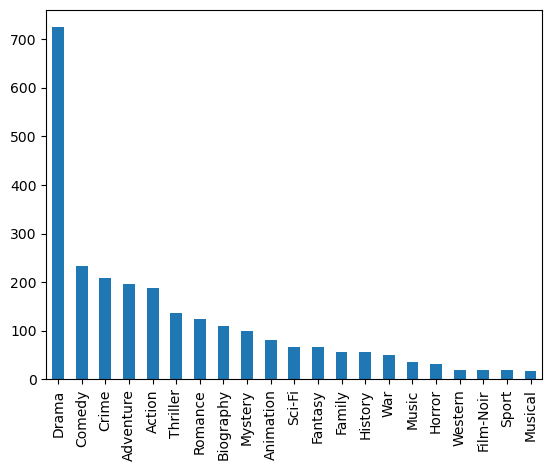

In [107]:
# Como vemos, el género más popular es Drama, seguido de Action y Comedy.
# Podemos hacer otro histograma con estos datos
genre_counts.plot(kind='bar')

#### Ejercicio 6.
- ¿Cuál es la nota media en las películas cuyo que tienen acción en alguno de sus géneros (Genre1 o Genre2 o Genre3)? 
- ¿Y en las de comedia? Haz una función para que sea sencillo comprobar esto para cualquier género.

Solución:

Nota media en películas de acción: 7.934965034965037

Nota media en películas de comedia: 7.872891566265061

In [108]:
# Ejercicio 6. 
def mean_rating_by_genre(df, genre):
    genre_filter = (df['Genre1'] == genre) | (df['Genre2'] == genre) | (df['Genre3'] == genre)
    return df[genre_filter]['IMDB_Rating'].mean()
print("Nota media en películas de acción:", mean_rating_by_genre(df, 'Action'))
print("Nota media en películas de comedia:",mean_rating_by_genre(df, 'Comedy'))

Nota media en películas de acción: 7.9486772486772495
Nota media en películas de comedia: 7.9034334763948495


In [109]:
# Veamos ahora la matriz de correlaciones entre las variables numéricas
# Una forma rápida de filtrar las columnas numéricas del dataset es con .select_dtypes
# (Aunque por supuesto, también podríamos hacerlo a mano)
df_numerica = df.select_dtypes(include=[np.number])
matriz_corr = df_numerica.corr()
print(matriz_corr)

# Hay 2 correlaciones signficativas:
# - Entre la puntuación de IMDB y el número de votos (corr. positiva)
# - Entre el número de votos y el dinero recaudado (corr. positiva) (NOTA: para el dinero recaudado, 
# hemos imputado 0 para los valores nulos, esto puede afectar a la correlación!)

# Podemos visualizar estas dos correlaciones positivas con un scatter plot, 
# pero dejemos eso para la siguiente clase de matplotlib...

              Runtime  IMDB_Rating  No_of_Votes     Gross
Runtime      1.000000     0.243096     0.173264  0.143928
IMDB_Rating  0.243096     1.000000     0.494979  0.082381
No_of_Votes  0.173264     0.494979     1.000000  0.602128
Gross        0.143928     0.082381     0.602128  1.000000


In [110]:
# Al igual que antes, podemos ver que directores aparecen más veces en el top 1000
directores_peliculas = df['Director'].value_counts()
directores_peliculas.head(10)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64

In [111]:
# También podemos averiguar qué directores tienen mejor puntuación media en sus películas en el top 1000

# Para ello, debemos agrupar el dataframe por director, también filtramos para incluir solo directores con al menos
# 3 películas para que sea más justo

# Filtramos la lista obtenida en la celda anterior para tener solo los directores con al menos 3 películas
# directores_filtrados es una Series de pandas, donde los índices son los nombres de los directores 
# y los valores son el número de películas que han dirigido. Extraemos los nombres de los directores con .index
directores_filtrados = directores_peliculas[directores_peliculas >= 3].index

# Ahora, filtramos el dataframe original para incluir solo los directores filtrados.
df_filtrado = df[df['Director'].isin(directores_filtrados)]

# Calculamos la puntuación media de IMDb por director. Para ello, usamos groupby para agrupar por director 
# y luego aplicamos la función mean()
director_media = df_filtrado.groupby('Director')['IMDB_Rating'].mean()

# Finalmente, ordenamos de mayor a menor
director_media = director_media.sort_values(ascending=False)
director_media.head(10)

Director
Christopher Nolan       8.462500
Peter Jackson           8.400000
Francis Ford Coppola    8.400000
Charles Chaplin         8.333333
Sergio Leone            8.266667
Stanley Kubrick         8.233333
Akira Kurosawa          8.220000
Frank Capra             8.200000
Quentin Tarantino       8.175000
Rajkumar Hirani         8.175000
Name: IMDB_Rating, dtype: float64

#### Ejercicio 7.
¿Cuál es la mejor película por director en el top 1000?
- Imprime las 5 primeras filas de este dataframe con el nombre del director, su mejor película (con mayor IMDB Rating) 
y su IMDB Rating.

Solución:

| Índice | Director                | Película                   | Puntuación |
|--------|-------------------------|----------------------------|------------|
| 0      | Frank Darabont          | The Shawshank Redemption   | 9.3        |
| 1      | Francis Ford Coppola    | The Godfather             | 9.2        |
| 2      | Christopher Nolan       | The Dark Knight           | 9.0        |
| 3      | Sidney Lumet            | 12 Angry Men              | 9.0        |
| 4      | Steven Spielberg        | Schindler's List          | 8.9        |


In [112]:
# Ejercicio 7. 
df_dir_movie = df.sort_values('IMDB_Rating', ascending=False).drop_duplicates(subset='Director', keep='first')
df_dir_movie = df_dir_movie[['Director', 'Series_Title', 'IMDB_Rating']].reset_index(drop=True)
print("Mejores películas en el top 5 de IMDB por directores:")
df_dir_movie.head(5)

Mejores películas en el top 5 de IMDB por directores:


,Director,Series_Title,IMDB_Rating
0,Frank Darabont,The Shawshank Redemption,9.3
1,Francis Ford Coppola,The Godfather,9.2
2,Sidney Lumet,12 Angry Men,9.0
3,Christopher Nolan,The Dark Knight,9.0
4,Peter Jackson,The Lord of the Rings: The Return of the King,8.9


In [113]:
# Por último, comprobemos qué actores tienen más roles en este top 1000
# Tenemos 4 columnas con actores: Star1, Star2, Star3 y Star4
df[['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4']].head()

,Series_Title,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [114]:
# Vamos a usar .concat() para combinar estas columnas en una sola serie
actores_concatenados = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
# Y ahora podemos contar cuántas veces aparece cada actor y ordenar de mayor a menor como antes
top_actores = actores_concatenados.value_counts()
print("Top de actores estrella con más roles en el top 1000 de IMDB:")
top_actores.head(10)

Top de actores estrella con más roles en el top 1000 de IMDB:


Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Clint Eastwood       12
Brad Pitt            12
Leonardo DiCaprio    11
Matt Damon           11
Christian Bale       11
James Stewart        10
Denzel Washington     9
Name: count, dtype: int64

### Y eso es todo por ahora!

En resumen, con Pandas y Notebooks podemos:
- Leer y guardar archivos CSV, Excel, ... en una sola línea
- Limpiar los datos y dejarlos en el formato que mejor nos convenga de forma sencilla
- Hacer análisis estadísticos-descriptivos de forma interactiva
- Realizar visualizaciones básicas

### En la siguiente clase veremos como hacer visualizaciones más interesantes con matplotlib y seaborn!